# **Modificación al Juego de la Vida: BUSCAMINAS**

### Modelos Cognitivos para Diseño y Comunicación
Profesor Santiago Negrete    |   Trimestre 21-O
#### EQUIPO 01

---

Elizabeth Cuevas

Diana Peña

Melina Ávila



In [37]:
import random
from PIL import Image, ImageDraw # Gráficos
import time

# Crea una tabla del tamaño dado, rellena de ceros
def tabla_vacia( dimension ):
  tabla = []
  for columna in range(dimension):
      renglon = []
      for i in range(dimension):
        renglon.append(0)
      tabla.append( renglon )
  return tabla

# Pone n unos en lugares al azar en la tabla dada
def minas_azar( tabla, n ):
  for i in range(n):
    renglon = random.randint(1, len(tabla)-2)          
    columna = random.randint(1, len(tabla)-2)      # Calcular posición del 1 excluyendo 
    tabla[renglon][columna] = 1                    # las celdas de la orilla
  return tabla

# Calcula el número de vecinos (unos) en la tabla dada, para la celda en 
# renglon,columna
def num_vecinos( tabla, renglon, columna ):
  vecinos = 0
  for i in range(-1,2):
    for j in range(-1,2):
      if not( i==0 and j==0 ):
        vecinos = vecinos + tabla[renglon+i][columna+j]
  return vecinos

# Dada una tabla, para cada una de las celdas internas (las que no están a la
# orilla), calcula el número de vecinos y lo almacena en una nueva tabla llamada vecinos.
def calcula_vecinos( tabla ):
  num_vec = tabla_vacia( len(tabla) )    # La tabla de vecinos tiene una celda menos por lado
  for i in range(1,len(num_vec)-1):
    for j in range (1,len(num_vec)-1):
      num_vec[i][j]= num_vecinos(tabla,i,j)
  return num_vec

# Función reglas_vida. Aplica las reglas del juego de la vida a todas las celdas de la tabla dada utilizando la tabla de vecinos

def reglas_vida( tabla, tab_vec ):
  for i in range(0,len(tab_vec)):
    for j in range (0,len(tab_vec)):
      # toda celula con tres vecinos vive (ya sea porque nace o porque sobrevive)
      if tab_vec[i][j] == 2: # or tab_vec[i][j] == 3:    # la celda tiene 3 vecinos
        tabla[i][j] = 1           # la nueva celda tiene una célula
      # toda celula con menos de dos vecinos muere
      if tab_vec[i][j] <= 1:
        tabla[i][j] = 0
      # toda celula con mas de 3 vecinos muere ahogada
      if tab_vec[i][j] > 3:
        tabla[i][j] = 0
  return tabla

def campo_minado( tabla, num_vec, alto = 20, largo = 20, espacio =2, peso='1' ):
  imagen = Image.new( 'RGB', ( len(tabla)*largo,len(tabla)*alto ), (150, 150, 150) )
  draw = ImageDraw.Draw(imagen)
 
  for ren in range( 0, len(tabla) ):
    for col in range( 0, len(tabla) ):      
      # Pintar cuadrícula fondo
      if tabla[ren][col]== 0:         
        draw.rectangle((col*largo, ren*alto,(col*largo)+largo-espacio, (ren*alto)+alto-espacio), fill=(150,150,150), outline=(180,180,180), width = peso)

      # Pintar células que nacen
      if tabla[ren][col] == 0 and (num_vec[ren][col] == 2): # or num_vec[ren][col] == 3):         
        draw.rectangle((col*largo, ren*alto,(col*largo)+largo-espacio, (ren*alto)+alto-espacio), fill=(200,200,200), outline=(120,120,120), width = peso)
        # Efecto de sombra
        draw.line([(col*largo + largo - 3, ren*alto + 1 ), (col*largo + largo -3, ren*alto + alto -1)], fill = (130,130,130), width = 4 )
        draw.line([(col*largo, ren*alto + alto - 3), (col*largo + largo -3, ren*alto + alto - 3)], fill = (130,130,130), width = 4 )
        # Brillo
        draw.line([(col*largo + 1, ren*alto + 1 ), (col*largo +1, ren*alto + alto - 5)], fill = (240,240, 240), width = 2 )
        draw.line([(col*largo + 1, ren*alto -1), (col*largo + largo -5, ren*alto -1)], fill = (240,240, 240), width = 2 )

        # Círculo negro ---
        #draw.ellipse((col*largo, ren*alto,(col*largo)+largo-espacio, (ren*alto)+alto-espacio), fill=(30,30,30), outline= None, width = peso)

      # Pintar células vivas
      if tabla[ren][col] == 1 :        
        # Fondo gris---
        draw.rectangle((col*largo, ren*alto,(col*largo)+largo-espacio, (ren*alto)+alto-espacio), fill=(150, 150, 150), outline=None)  

        # Celda verde ---  
        #draw.rectangle((col*largo, ren*alto, (col*largo)+largo-espacio, (ren*alto)+alto-espacio), fill=(0,200,75), outline=(120,120,120), width = peso)

        # Triángulo equilátero ---
        #draw.polygon(( (col*largo + 3, ren*alto + 2), (col*largo + 3, ren*alto + alto - 3), (col*largo + largo - 3, ren*alto + int(alto/2))), 
                     #fill=(0,200,75), outline = (0,200,75))

        # Trazo de bandera
        draw.polygon(( (col*largo + 5, ren*alto + 2), (col*largo + 5, ren*alto + alto - int(alto/2)+2), (col*largo + largo - 3, ren*alto + int(alto/4)+2)), 
                     fill=(0,160,100), outline = (0,160,100))
        draw.line([(col*largo + 5, ren*alto + 2), (col*largo + 5, ren*alto + alto - 4)], fill = (80,80,80), width = 2 )
        draw.line([(col*largo + 2, ren*alto + alto - 4), (col*largo + 10, ren*alto + alto - 4)], fill = (80,80,80), width = 2 )

      # Pintar células que mueren (minas explotando)
      if tabla[ren][col] == 1 and (num_vec[ren][col] > 3 or num_vec[ren][col] <= 1):        
        draw.rectangle((col*largo, ren*alto + 1,(col*largo)+largo, (ren*alto)+alto- espacio), fill=(150,150,150), outline = None) #(180,180,180), width = 1)
        # Trazos para los piquitos de la mina, los cuales se conforman de linas intersectadas
        draw.line([(col*largo + 3, ren*alto + int(alto/2)), (col*largo + largo -3, ren*alto + int(alto/2))], fill = (90,90,90), width = 2 )
        draw.line([(col*largo + int(largo/2), ren*alto + 3), (col*largo + int(largo/2), ren*alto + alto -3)], fill = (90,90,90), width = 2 )
        draw.line([(col*largo + 4, ren*alto + 4), (col*largo + 15, ren*alto + 15)], fill = (90,90,90), width = 2 )
        draw.line([(col*largo + 15, ren*alto + 4), (col*largo + 5, ren*alto + 16)], fill = (90,90,90), width = 2 )
        # Trazo de la mina
        draw.ellipse((col*largo + 5, ren*alto + 5, (col*largo) + 15, (ren*alto) + 15), fill= (30,30,30), outline= None) # (90,90,90) , width = 2)
        # Acento blanco
        draw.ellipse((col*largo + 7, ren*alto + 7, (col*largo) + 9, (ren*alto) + 9), fill=(250,250,250), outline= None)
 
  return imagen

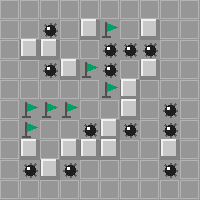

In [38]:

tablero = minas_azar(tabla_vacia(10),25)
vecinos = calcula_vecinos( tablero )

# Prueba para guardar imagen en lista
test = []
one = campo_minado( tablero, vecinos, espacio = 2,  peso=1 )
test.append(one)
display(one)

In [ ]:
test

[<PIL.Image.Image image mode=RGB size=300x300 at 0x7F215F0E27D0>]

In [ ]:
for i in range(len(vecinos)):
  print(vecinos[i])

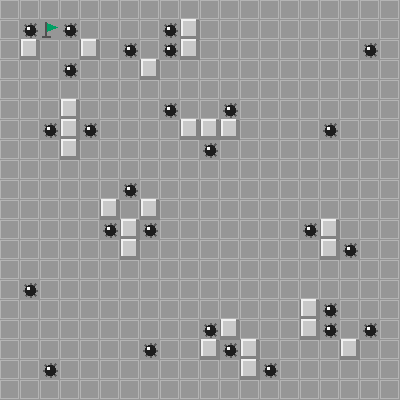

Generación: 1


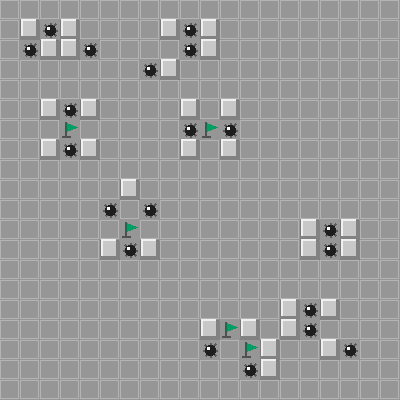

Generación: 2


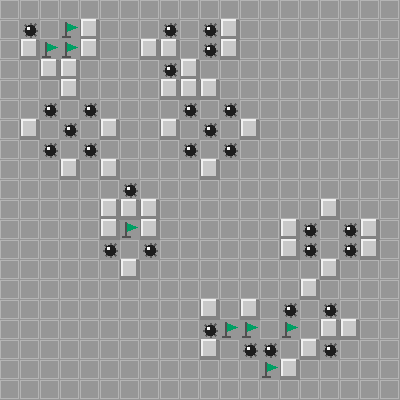

Generación: 3


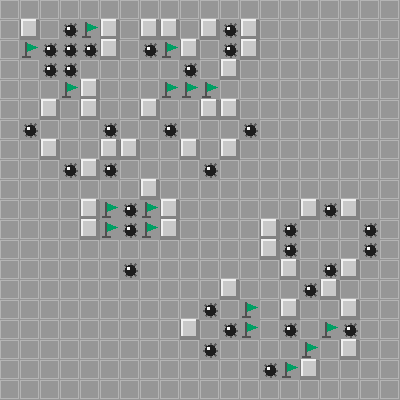

Generación: 4


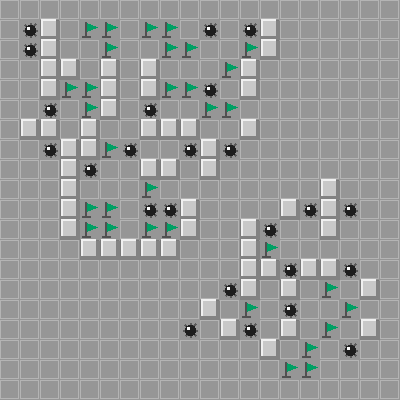

Generación: 5


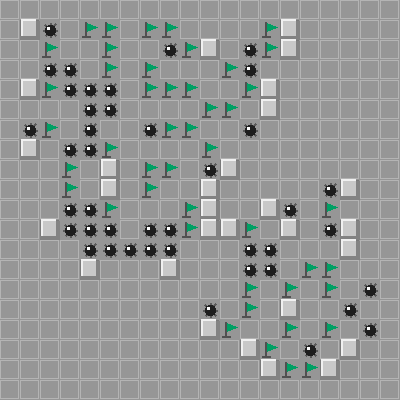

Generación: 6


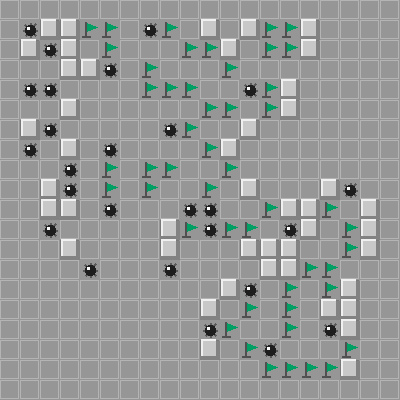

Generación: 7


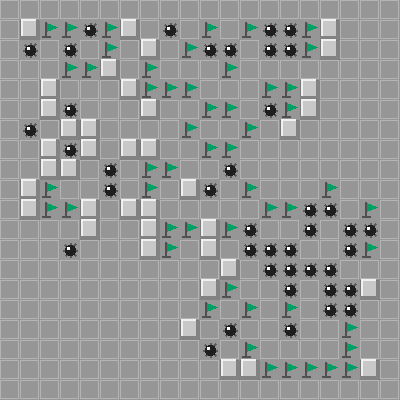

Generación: 8


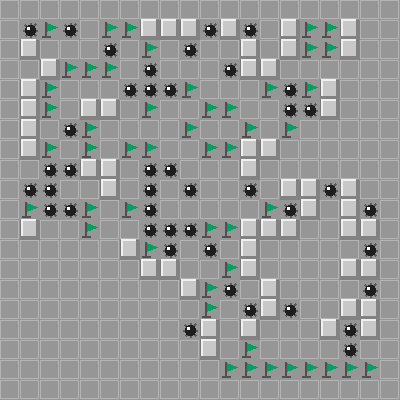

Generación: 9


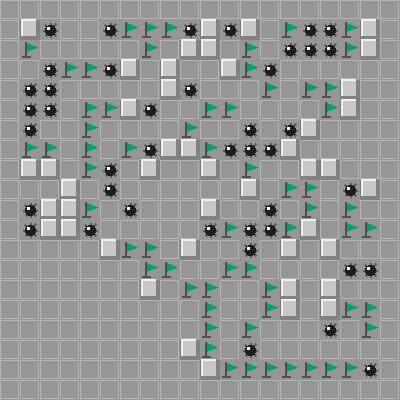

Generación: 10


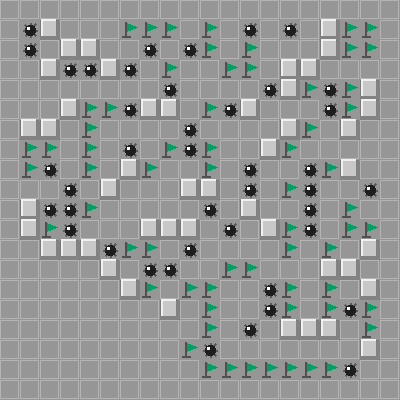

Generación: 11


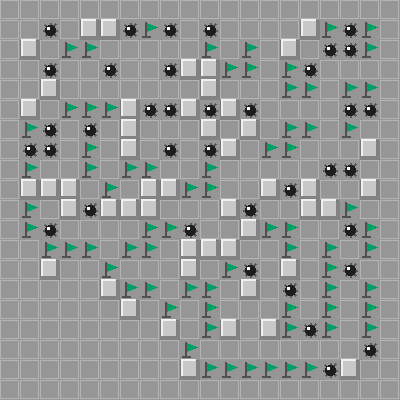

Generación: 12


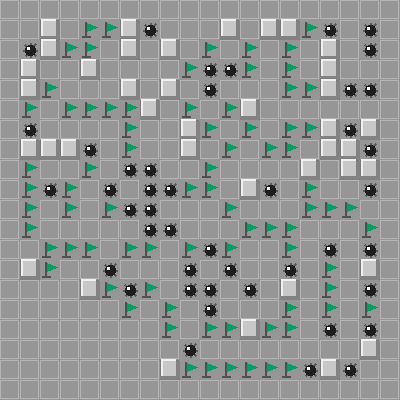

Generación: 13


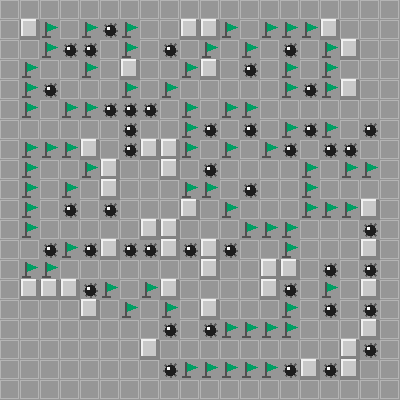

Generación: 14


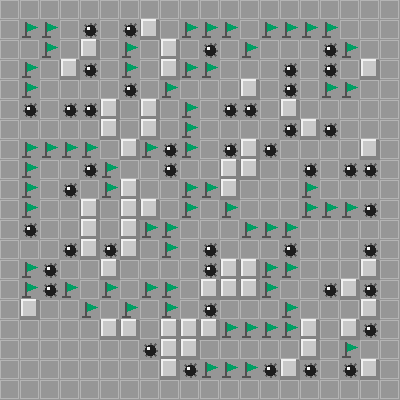

Generación: 15


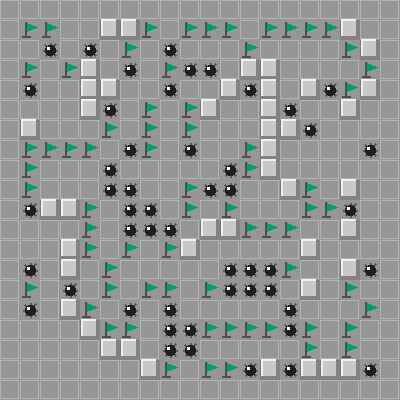

Generación: 16


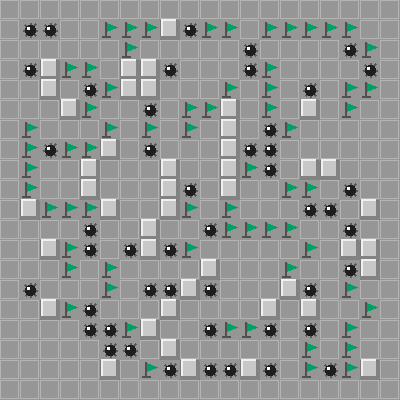

Generación: 17


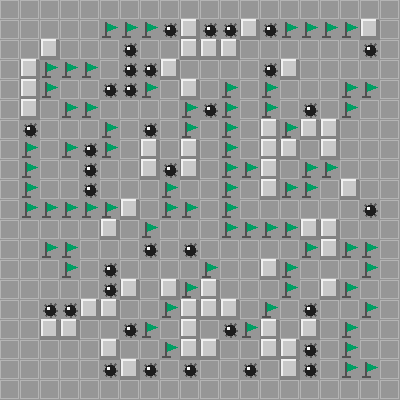

Generación: 18


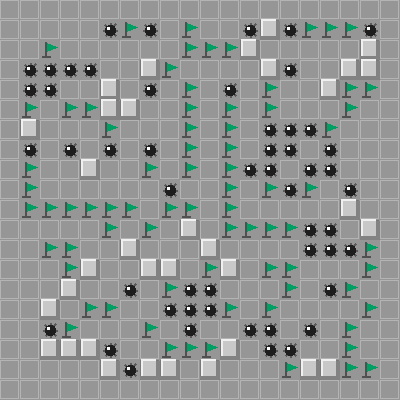

Generación: 19


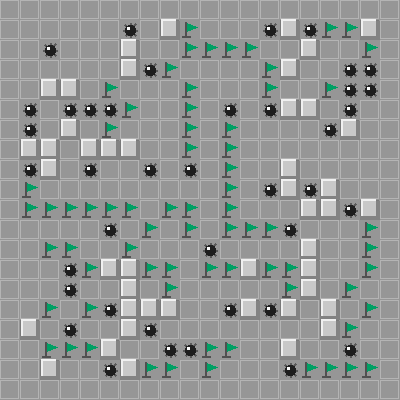

Generación: 20


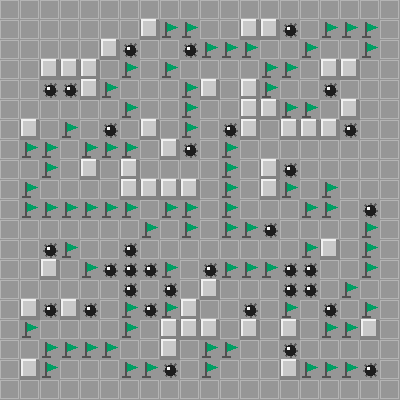

Generación: 21


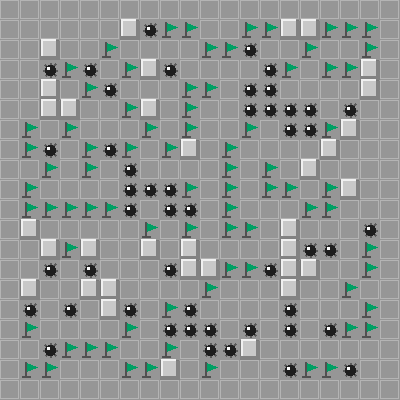

Generación: 22


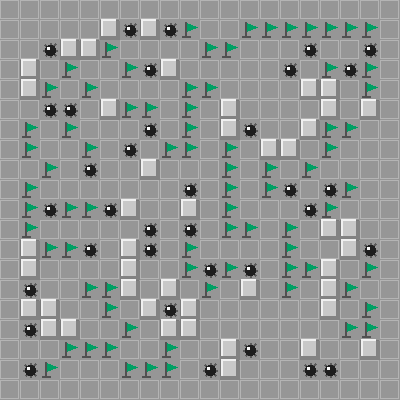

Generación: 23


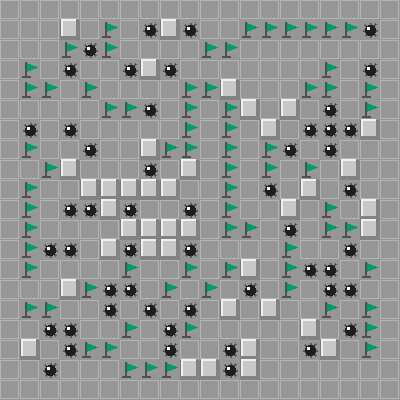

Generación: 24


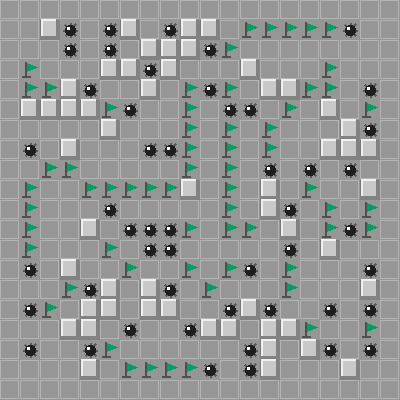

Generación: 25


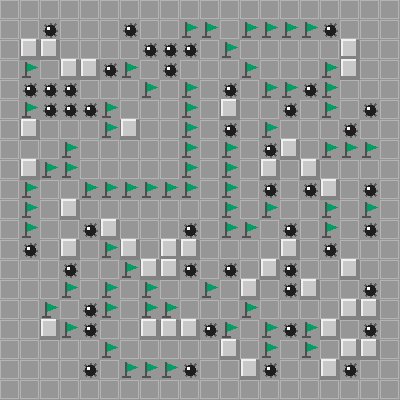

Generación: 26


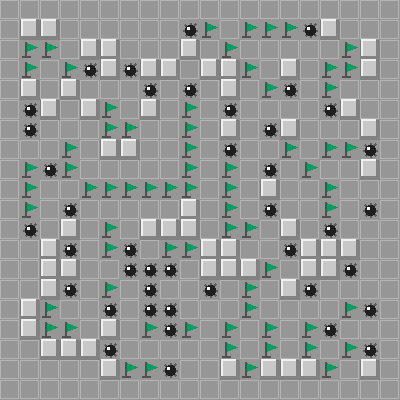

Generación: 27


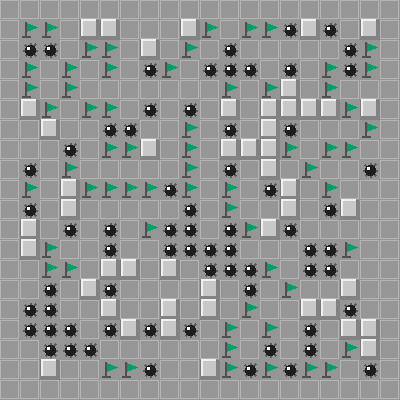

Generación: 28


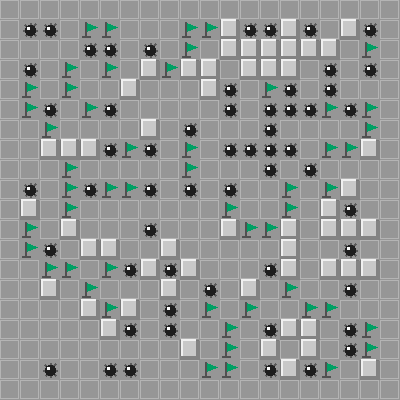

Generación: 29


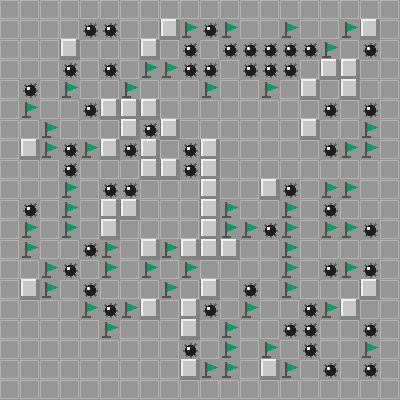

Generación: 30


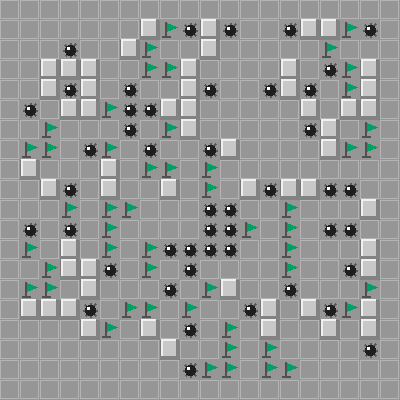

In [39]:
dimension = 20
n_gen = 30
n_celulas = 30

seq = []

tabla = tabla_vacia( dimension )
tab_minas = minas_azar( tabla, n_celulas ) # [1]

ven = calcula_vecinos( tab_minas )  # [2]

imagen = campo_minado( tab_minas, ven, espacio = 2,  peso = 1  ) # [3]
display(imagen)
seq.append(imagen)  # [4]

for gen in range(0,n_gen):
  print('Generación: ', end='')
  print(gen+1)
  
  #for i in range(len(ven)): # Comprobación del conteo de vecinos
    #print(ven[i])
  tab_minas = reglas_vida( tab_minas, ven ) # [1]
  ven = calcula_vecinos( tab_minas )  # [2]

  imagen = campo_minado( tab_minas, ven, espacio = 2,  peso = 1  ) # [3]
  display(imagen)
  seq.append(imagen) # [4]

  #imagen.save('/content/drive/MyDrive/Colab Notebooks/sim_vida/generacion'+str(gen)+'.gif')

  time.sleep(1)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
def generate_gif(images, path):
    frame = images[0]
    frame.save(path, format="GIF", append_images=images, save_all=True, duration=650, loop=0)

generate_gif(seq, "/content/drive/MyDrive/Colab Notebooks/minesweeper.gif")